# Song Recommendation using KMeans Clustering
An example of how we find clusters in data using K-Means

As defined by Spotify:

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

## 1. Library Imports and Data Loading

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv("data/songs.csv")

## 2. Understanding the Data

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist        2000 non-null   object 
 1   song          2000 non-null   object 
 2   acousticness  2000 non-null   float64
 3   speechiness   2000 non-null   float64
 4   danceability  2000 non-null   float64
dtypes: float64(3), object(2)
memory usage: 78.3+ KB


,artist,song,acousticness,speechiness,danceability
0,Britney Spears,Oops!...I Did It Again,0.3000,0.0437,0.751
1,blink-182,All The Small Things,0.0103,0.0488,0.434
2,Faith Hill,Breathe,0.1730,0.0290,0.529
3,Bon Jovi,It's My Life,0.0263,0.0466,0.551
4,*NSYNC,Bye Bye Bye,0.0408,0.0516,0.614


## 3. Data Processing

In [6]:
cols = ["acousticness", "speechiness", "danceability"]

scaler = MinMaxScaler()
scaler = scaler.fit(df[cols])
df_scaled = pd.DataFrame(scaler.transform(df[cols]), columns = cols)

## 4. Hyperparameter Tuning

/home/user/ATCS-2023/Labs/Unit07/SongRecommender/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[Errno 2] No such file or directory: 'lscpu'
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "/home/user/ATCS-2023/Labs/Unit07/SongRecommender/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/context.py", line 250, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "/nix/store/yvhwsfbh4bc99vfvwpaa70m4yng4pvpz-python3-3.11.8/lib/python3.11/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/nix/store/yvhwsfbh4bc99vfvwpaa70m4yng4pvpz-python3-3.11.8/lib/python3.11/subprocess.py", line 1026, in __init__
    self._execute_child(a

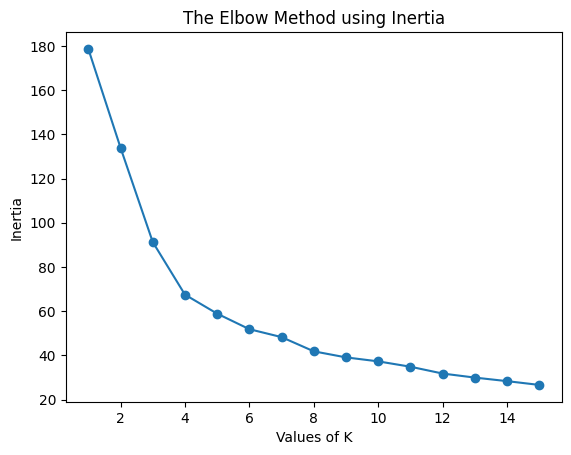

In [7]:
inertias = []
for k in range (1,16):
    model = KMeans(n_clusters=k, random_state=5)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

# Plot the inertias to find the Elbow
plt.plot(range(1, 16), inertias, marker="o")
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.title("The Elbow Method using Inertia")
plt.show()

## 5. Build our Model

In [8]:
# Construct model w/ 6 clusters (no significant change in intertia after that)
model = KMeans(n_clusters=6, random_state=5)
model = model.fit(df_scaled)

## 6. Viewing Results

In [9]:
model.labels_
model.inertia_
model.cluster_centers_
df["label"] = model.labels_
df.head()

,artist,song,acousticness,speechiness,danceability,label
0,Britney Spears,Oops!...I Did It Again,0.3000,0.0437,0.751,2
1,blink-182,All The Small Things,0.0103,0.0488,0.434,4
2,Faith Hill,Breathe,0.1730,0.0290,0.529,4
3,Bon Jovi,It's My Life,0.0263,0.0466,0.551,4
4,*NSYNC,Bye Bye Bye,0.0408,0.0516,0.614,4


## 7. Evaluation

In [10]:
silhouette_score(df_scaled, model.labels_)

0.3401136466376936

## 8. Song Recommendation

In [13]:
selected_song = "Bye Bye Bye"
song = df[df["song"] == selected_song]
cluster = song["label"].values[0]
recommendations = df[df["label"] == cluster]
recommendations.head(recommendations.shape[0])

,artist,song,acousticness,speechiness,danceability,label
1,blink-182,All The Small Things,0.0103,0.0488,0.434,4
2,Faith Hill,Breathe,0.1730,0.0290,0.529,4
3,Bon Jovi,It's My Life,0.0263,0.0466,0.551,4
4,*NSYNC,Bye Bye Bye,0.0408,0.0516,0.614,4
10,Gigi D'Agostino,L'Amour Toujours,0.0328,0.0292,0.617,4
...,...,...,...,...,...,...
1981,Sam Feldt,Post Malone (feat. RANI),0.0771,0.1220,0.590,4
1988,Panic! At The Disco,High Hopes,0.1930,0.0618,0.579,4
1990,Sam Smith,How Do You Sleep?,0.1530,0.0925,0.477,4
1992,Normani,Motivation,0.0192,0.0984,0.599,4
